In [299]:
#Base de dados: Covid19br (https://github.com/wcota/covid19br/)

In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as npy
from numpy.random import rand

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

covid_dataset_cities = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-cities.csv')
covid_dataset_state = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-states.csv')
covid_dataset_total = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-total.csv')
covid_dataset_time_total = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-cities-time_changesOnly.csv')
covid_dataset_state

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30837,311,2023-03-18,Brazil,SC,TOTAL,0,22703,0,1986447,22703,...,2568392.0,35847.42493,6308275.0,88.04552,5862014.0,81.81699,277356.0,3.87110,4166331.0,58.15009
30838,311,2023-03-18,Brazil,SE,TOTAL,0,6502,0,359692,6502,...,604183.0,26283.72782,2023048.0,88.00851,1860868.0,80.95320,43065.0,1.87345,1376006.0,59.86029
30839,311,2023-03-18,Brazil,SP,TOTAL,0,179039,0,6469442,179039,...,19501783.0,42469.91918,43381275.0,94.47337,40857206.0,88.97659,1286285.0,2.80120,29057424.0,63.27967
30840,311,2023-03-18,Brazil,TO,TOTAL,0,4232,0,365538,4232,...,903975.0,57473.10960,1183632.0,75.25320,1029319.0,65.44226,56219.0,3.57430,595805.0,37.88021


In [301]:
covid_dataset_cities = covid_dataset_cities.drop(columns=['ibgeID', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', '_source', 'date', 'newCases', 'newDeaths', 'last_info_date'])
covid_dataset_cities[covid_dataset_cities['totalCases'] == covid_dataset_cities['totalCases'].max()]

,country,state,city,deaths,totalCases
4225,Brazil,RJ,Rio de Janeiro/RJ,38144,1316242


In [302]:
covid_dataset_cities = covid_dataset_cities.groupby(['state','country'], as_index=False).sum()

C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_2544\529661877.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(top_10_states_cases.state.values, handles=handles, fontsize=15)
C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_2544\529661877.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels, color = 'black', fontsize='12', horizontalalignment='center')
C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_2544\529661877.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_10_states_cases.state.values, color = 'black', fontsize='12')


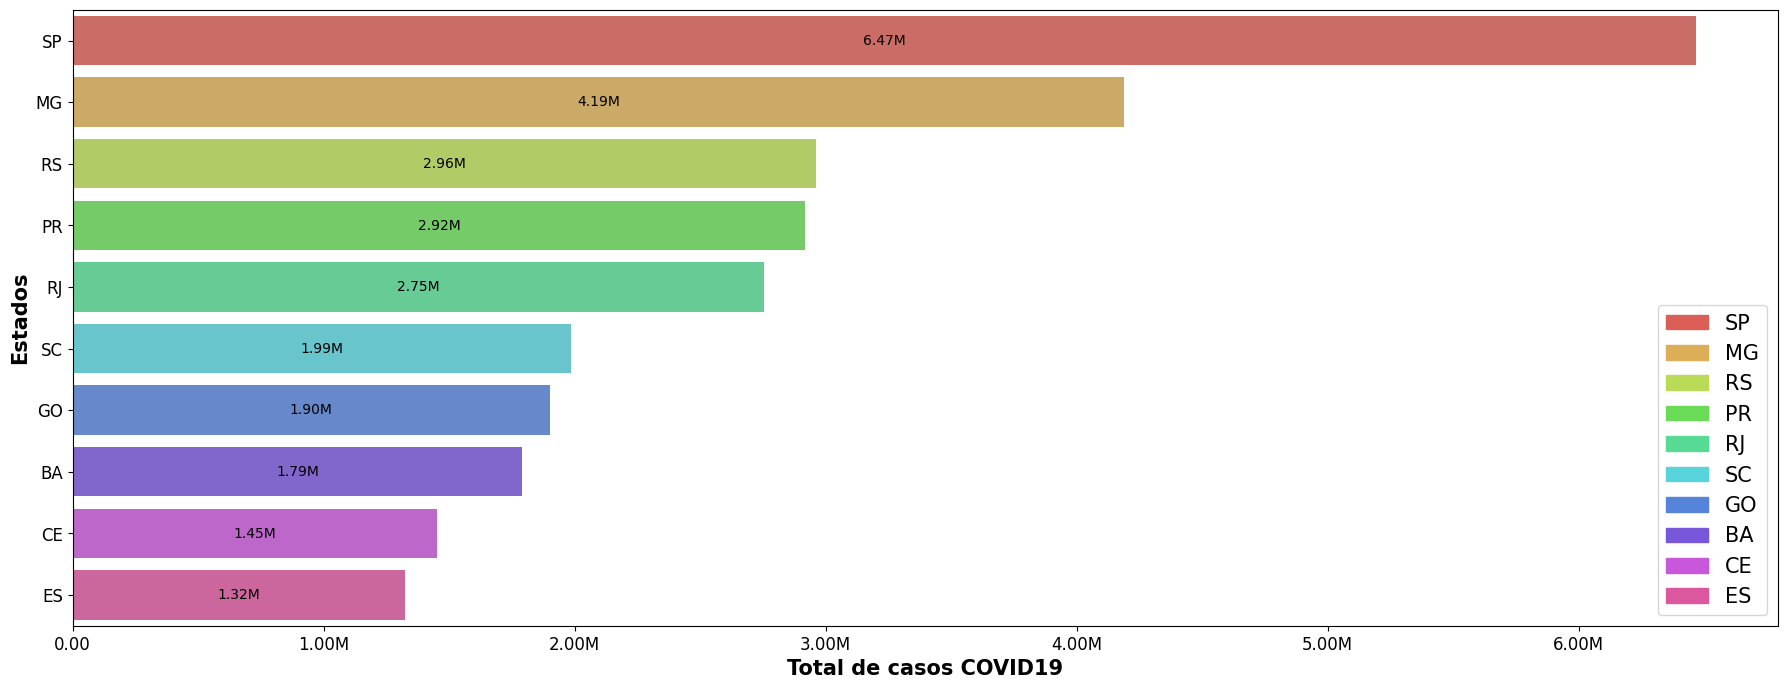

In [303]:
top_10_states_cases = covid_dataset_cities.nlargest(n=10, columns=['totalCases']).drop(columns=['city'])
fig = plt.figure(figsize=(22,8))
palette = sns.color_palette('hls', len(top_10_states_cases.totalCases.unique()))
ax = sns.barplot(x='totalCases', y='state', data=top_10_states_cases, orient='h', palette=palette, hue='state', dodge=False)
xlabels = [human_format(x) for x in ax.get_xticks()]

for container in ax.containers:
    ax.bar_label(container, label_type="center", labels=[f'{human_format(x.get_width())}' for x in container])

handles = []
for label, s in zip(palette.as_hex(),top_10_states_cases.state.values) :
    handles.append(mpatches.Patch(color=label, label=s))

plt.legend(top_10_states_cases.state.values, handles=handles, fontsize=15)
plt.xlabel('Total de casos COVID19', fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')
plt.ylabel('Estados', fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')
ax.set_xticklabels(xlabels, color = 'black', fontsize='12', horizontalalignment='center')
ax.set_yticklabels(top_10_states_cases.state.values, color = 'black', fontsize='12')
plt.show()


In [304]:
covid_dataset_clean = covid_dataset_time_total[['state', 'newCases', 'date']]
covid_dataset_clean = covid_dataset_time_total[covid_dataset_time_total['state'] != 'TOTAL']
pattern = 'CASO SEM LOCALIZAÇÃO DEFINIDA.*'
covid_dataset_clean = covid_dataset_clean[~covid_dataset_clean['city'].str.contains(pattern)]

covid_dataset_clean['mes_ano'] = pd.to_datetime(covid_dataset_clean['date'], format='ISO8601')
covid_dataset_clean = covid_dataset_clean[covid_dataset_clean['mes_ano'].dt.year.astype(str) == '2022']

covid_dataset_clean['mes_ano'] = covid_dataset_clean['mes_ano'].dt.strftime('%b-%Y')
covid_dataset_clean = covid_dataset_clean[['newCases','mes_ano']].groupby(['mes_ano'], as_index=False).sum()
covid_dataset_clean['mes_ano'] = pd.to_datetime(covid_dataset_clean['mes_ano'], format='mixed')
covid_dataset_clean.sort_values(by='mes_ano', inplace = True)
covid_dataset_clean['mes_ano'] = covid_dataset_clean['mes_ano'].dt.strftime('%b-%Y')

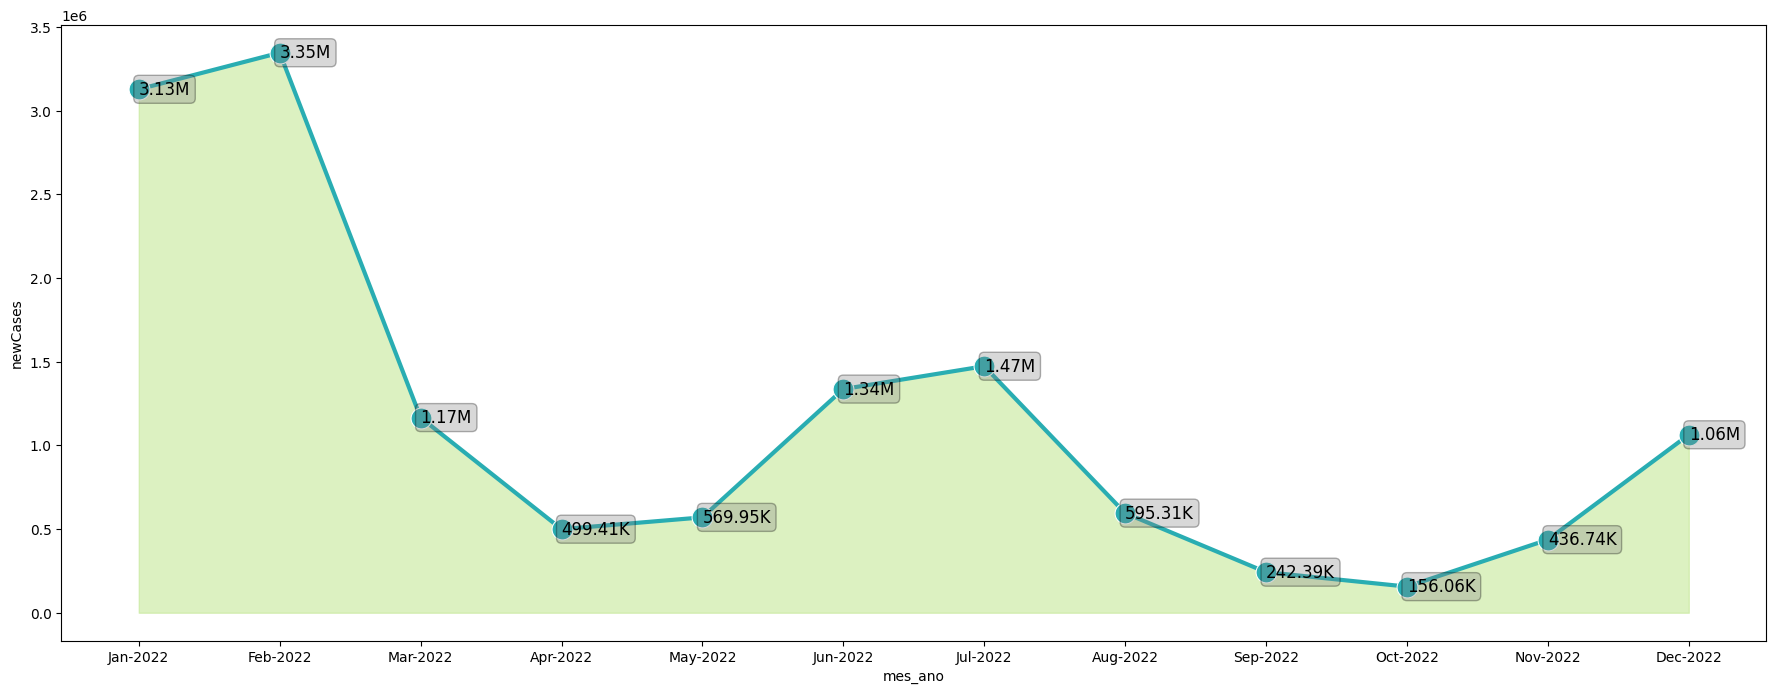

In [305]:
fig = plt.figure(figsize=(22,8))
sns.lineplot(data=covid_dataset_clean, x='mes_ano', y='newCases', marker='o', linewidth = 3, markersize=15, color='#29ADB2')
plt.fill_between(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases'], color='#C5E898', alpha=0.6)
for x, y in zip(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases']):
    plt.text(x = x, y = y-150, s = human_format(y), fontsize=12, color = 'black', ha='left', va='center',
             bbox=dict(facecolor='grey', boxstyle='round', alpha=0.3))
plt.show()


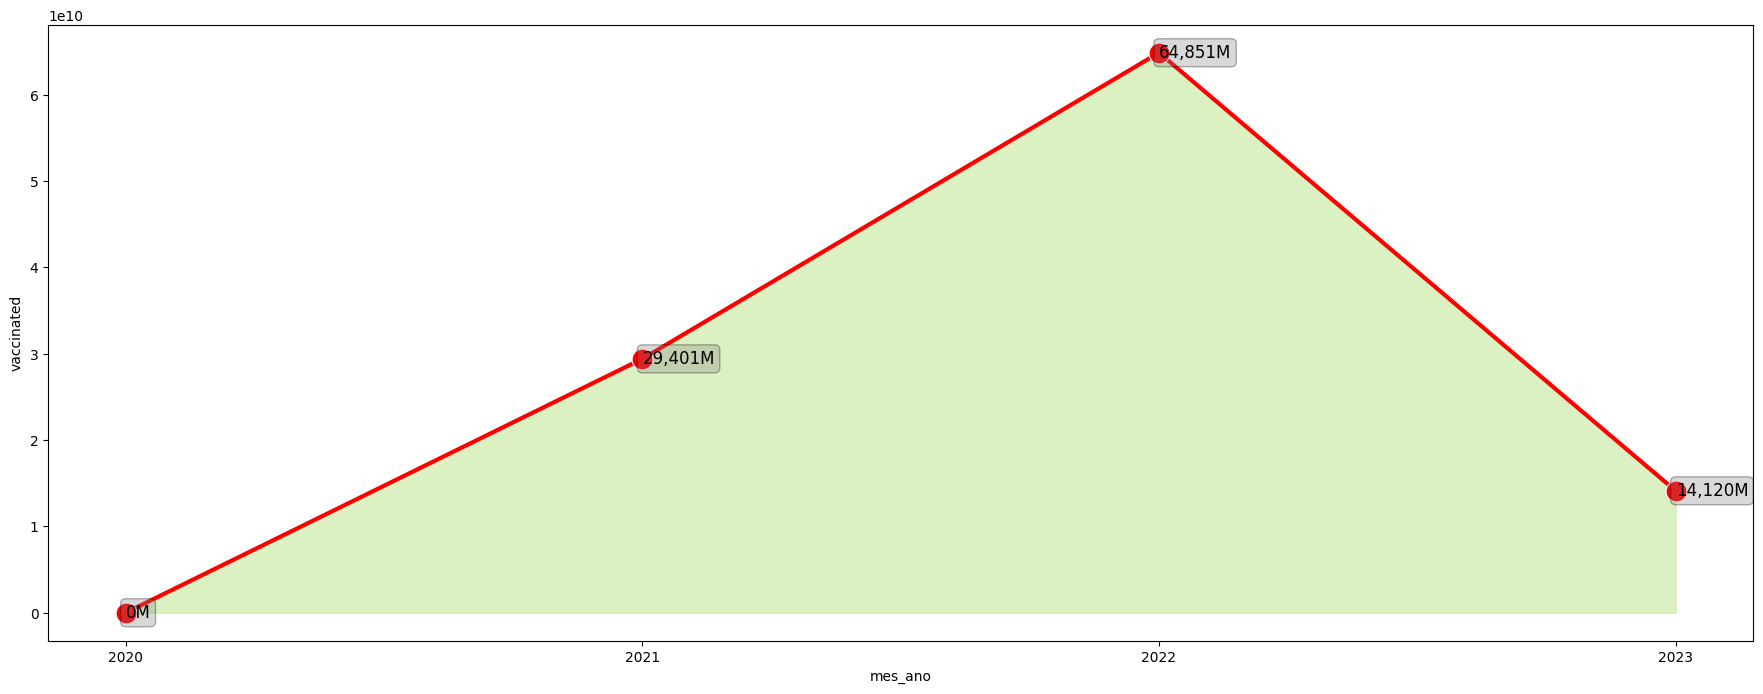

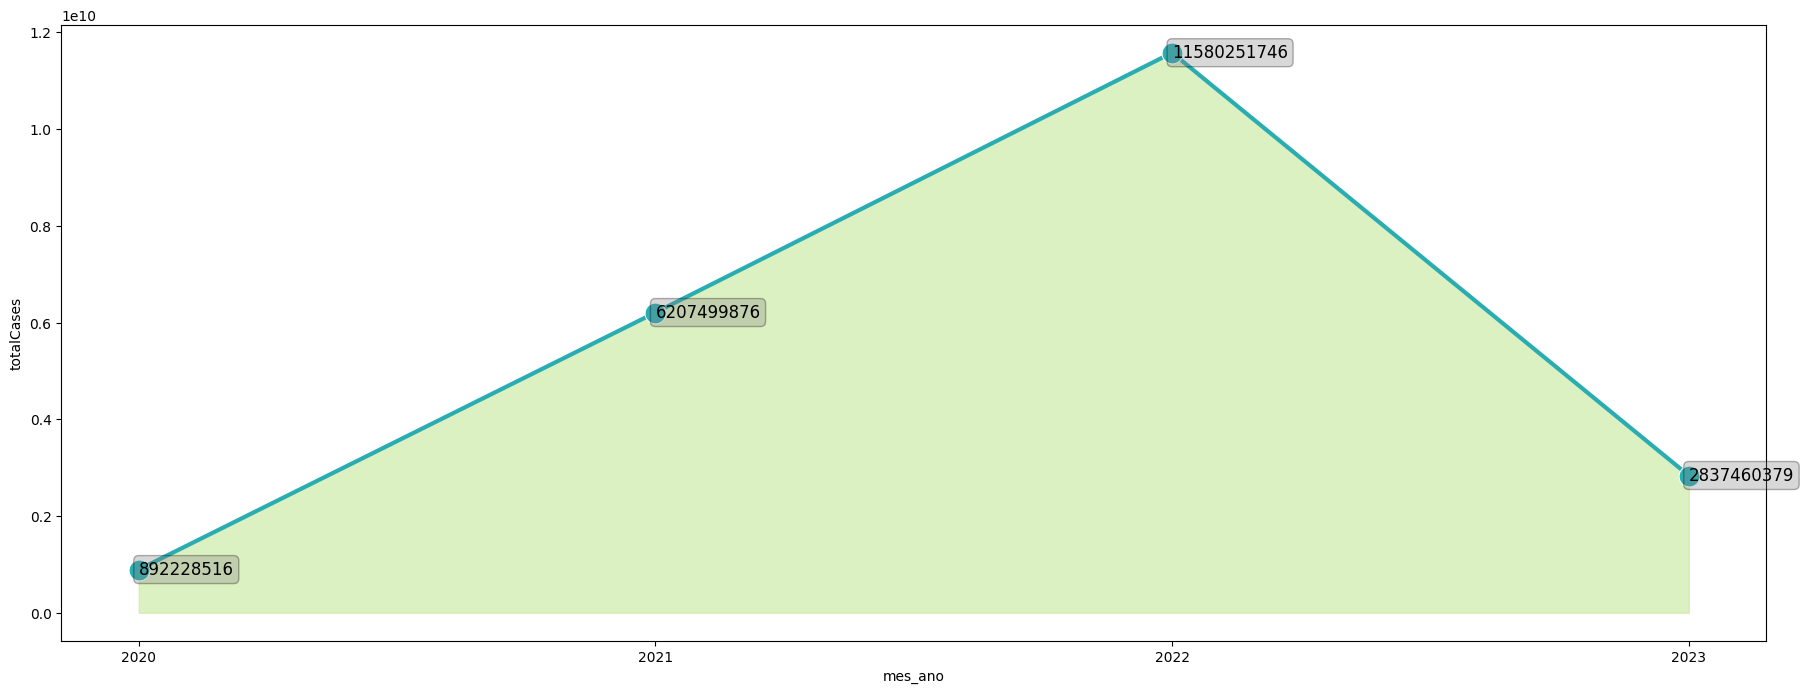

In [306]:
#covid_state_dataset_clean = covid_dataset_state[['state', 'newCases', 'date']]
covid_state_dataset_clean = covid_dataset_state[covid_dataset_state['state'] != 'TOTAL']
pattern = 'CASO SEM LOCALIZAÇÃO DEFINIDA.*'
covid_state_dataset_clean = covid_state_dataset_clean[~covid_state_dataset_clean['city'].str.contains(pattern)]
covid_state_dataset_clean = covid_state_dataset_clean[['date', 'state', 'totalCases', 'vaccinated']]
covid_state_dataset_clean['vaccinated'] = covid_state_dataset_clean['vaccinated'].fillna(0)
covid_state_dataset_clean['date'] = pd.to_datetime(covid_state_dataset_clean['date'], format='ISO8601')
#covid_state_dataset_clean = covid_state_dataset_clean[covid_state_dataset_clean['date'].dt.year.astype(str) == '2022']
covid_state_dataset_clean['mes_ano'] = covid_state_dataset_clean['date'].dt.strftime('%Y')
covid_state_dataset_clean = covid_state_dataset_clean[['state','mes_ano', 'totalCases', 'vaccinated']].groupby(['mes_ano'], as_index=False).sum()
covid_state_dataset_clean['mes_ano'] = pd.to_datetime(covid_state_dataset_clean['mes_ano'], format='mixed')
covid_state_dataset_clean.sort_values(by='mes_ano', inplace = True)
covid_state_dataset_clean['mes_ano'] = covid_state_dataset_clean['mes_ano'].dt.strftime('%Y')

fig = plt.figure(figsize=(22,8))

g = sns.lineplot(data=covid_state_dataset_clean, x='mes_ano', y='vaccinated', marker='o', linewidth = 3, markersize=15, color='red')
plt.fill_between(covid_state_dataset_clean['mes_ano'], covid_state_dataset_clean['vaccinated'], color='#C5E898', alpha=0.6)
for x, y in zip(covid_state_dataset_clean['mes_ano'], covid_state_dataset_clean['vaccinated']):
    plt.text(x = x, y = y-150, s = '{:,}'.format(round(y/1000000)) + 'M', fontsize=12, color = 'black', ha='left', va='center',
             bbox=dict(facecolor='grey', boxstyle='round', alpha=0.3))
plt.show()
fig = plt.figure(figsize=(22,8))
sns.lineplot(data=covid_state_dataset_clean, x='mes_ano', y='totalCases', marker='o', linewidth = 3, markersize=15, color='#29ADB2')
plt.fill_between(covid_state_dataset_clean['mes_ano'], covid_state_dataset_clean['totalCases'], color='#C5E898', alpha=0.6)
for x, y in zip(covid_state_dataset_clean['mes_ano'], covid_state_dataset_clean['totalCases']):
    plt.text(x = x, y = y-150, s = y, fontsize=12, color = 'black', ha='left', va='center',
             bbox=dict(facecolor='grey', boxstyle='round', alpha=0.3))
plt.show()